# Paquete `lineas.py`
A. Salinas. TO 18-19.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Se importan los paquetes `numpy` para el cálculo científico, y `matplotlib.pyplot` para la representación gráfica. Los diferentes métodos de los paquetes se nombran con los alias `np` y `plt`.

## Constantes

In [2]:
pi=np.pi  
Np2db=20.*np.log10(np.e)
Db2np=1./Np2db
D2r=pi/180.
R2d=180./pi

Se define una serie de variables que se suelen usar:

* `pi` define el número $\pi$
* `Np2db` define la conversión de Neper a dB
* `Db2np` el inverso del anterior
* `D2r` y `R2d` conversión de grados a radianes y viceversa

## Funciones `print`

Las funciones para mostrar por pantalla con un formato amigable son: `Pr, Prc, Prv`:

In [3]:
def Pr(lis):
    """
    Imprime la lista de reales: Pr((pi,))
    Usa diferentes lineas. Formato 0:9.2E
    """
    for i in lis:
        print('{0:9.2E}'.format(i)) 

def Prc(co,va):
    """
    Imprime la lista de cabeceras y de reales: 
    Pr(('Pi',),(pi,))
    Usa diferentes lineas. Formato 0:9.2E
    """
    for i, ca in enumerate(co):
        print(ca+'='+'{0:9.2E}'.format(va[i]))        
        
def Prv(co,va):
    """
    Imprime una cabecera y la lista de reales: 
    Pr(('Val',),(1.,2.,3.))
    Usa una sola linea. Formato 0:9.2E
    """
    print(co+'=',end='')
    for i in va:
        print('{0:9.2E}'.format(i),end='')
    print()

Sirven para escribir la salida al formato científico con dos cifras decimales. La entrada es una lista o una tupla. Para un solo número hay que escribir `Pr((pi,))`.

In [4]:
Pr((pi,Np2db,Db2np,D2r,R2d))

 3.14E+00
 8.69E+00
 1.15E-01
 1.75E-02
 5.73E+01


In [5]:
Prc(('Np a dB','dB a Np'),(Np2db,Db2np))
Prv('Angulos',[180*D2r,pi/2.*R2d,90*D2r])

Np a dB= 8.69E+00
dB a Np= 1.15E-01
Angulos= 3.14E+00 9.00E+01 1.57E+00


## Complejos en cartesianas y en polares

In [6]:
def C2p(x):
    """
    Complejo a tupla de polares.
    """
    return (np.abs(x),np.angle(x))

def C2pD(x):
    """
    Complejo a tupla de polares 
    con fase en grados.
    """
    return (np.abs(x),np.angle(x)*R2d)

def P2c(r,th):
    """
    Tupla de polares a tupla de cartesianas.
    """
    return (r*np.cos(th),r*np.sin(th))

def P2cD(r,th):
    """
    Tupla de polares con fase en grados 
    a tupla de cartesianas.
    """
    thr=th*D2r
    return P2c(r,thr)

Estas funciones sirven para la conversión entre cartesianas y polares. Resultan de mucha utilidad en la aritmética habitual de los problemas de líneas.

* `C2p(x)` devuelve el par correspondiente a módulo y fase del número complejo `x`
* `C2pD(x)` es igual que `C2p(x)` pero el argumento lo devuelve en grados
* `P2c(x)` y `P2cD(x)` hacen el mismo trabajo desde polares a cartesianas
Las funciones devuelven la salida en forma de tupla: `(val1,val2)`.

In [7]:
co=1+1j # Un numero complejo
# Modulo y fase (en radianes) de un numero complejo
poco=(1,45*D2r) 
# Modulo y fase (en grados) de un numero complejo
pocoD=(1,45)  
Prv('1+1j en polares es:',C2p(co))
Prv('1+1j en polares (fase en grados) es:',C2pD(co))
Prc(('Parte real de (1,Pi/4 radianes)',\
     'Parte imaginaria de (1,Pi/4 radianes)'),(*P2c(*poco),))
Prc(('Parte real de (1,45 grados)',\
     'Parte imaginaria de (1,45 grados)'),(*P2cD(*pocoD),))

1+1j en polares es:= 1.41E+00 7.85E-01
1+1j en polares (fase en grados) es:= 1.41E+00 4.50E+01
Parte real de (1,Pi/4 radianes)= 7.07E-01
Parte imaginaria de (1,Pi/4 radianes)= 7.07E-01
Parte real de (1,45 grados)= 7.07E-01
Parte imaginaria de (1,45 grados)= 7.07E-01


## Funciones propias de las líneas

In [9]:
def Gr(zl,z0):
    """
    Coeficiente de reflexion en la carga.
    Impedancia de carga e impedancia intrinseca. 
    Complejas.
    """
    return (zl-z0)/(zl+z0)

def Zw(zp,zl,z0,coe):
    """
    Impedancia de onda. Caso con perdidas.
    (zp,zl,z0,const. de propagacion, complejo).
    """
    zw=z0*(zl+z0*np.tanh(coe*zp))/(z0+zl*np.tanh(coe*zp))
    return zw

def ZwSP(zp,zl,z0,be):
    """
    Impedancia de onda. Caso sin perdidas.
    (zp,zl,z0,const. fase).
    """
    zw=z0*(zl+z0*1.j*np.tan(be*zp))/(z0+zl*1.j*np.tan(be*zp))
    return zw


Estas funciones sirven para calcular el coeficiente de reflexión en la carga, $\Gamma_L$, la impedancia de la onda en cada punto de la línea $z'$, $Z_w(z')$ y esta misma magnitud para el caso de una línea sin pérdidas.

Las variables son:

* `zp` es la posición en la línea a partir de la carga. Es positiva.
* `zl` es la impedancia de carga en $\Omega$
* `z0` es la impedancia intrínseca de la línea
* `coe` o `be` es el coeficiente de propagación o el coeficiente de fase respectivamente.

Todas las funciones devuelven el valor en la forma cartesiana del complejo correspondiente.

### Ejemplo:

Tengamos una línea con una impedancia característica de 75 $\Omega$, velocidad de fase $v_f=2.5 \times 10^8$ $m/s$ y longitud de 1 m. La impedancia de carga es $Z_L = 80 + \jmath 45$ $\Omega$. Se alimenta con un generador cuya frecuencia es de 300 MHz, suministra 10 V y tiene una impedancia interna de 50 $\Omega$. Determinar la potencia suministrada por el generador y voltaje e intensidad en la línea.

In [10]:
z0=75.
vf=2.5E8
ll=1.
zl=80.+1.j*45
zln=zl/z0
f=300.E6
vg=10.
zg=50.
w=2.*np.pi*f
beta=w/vf
londa=2.*np.pi/beta
gammaL=Gr(zl,z0)
Prc(('Beta(rad/m)', 'GammaL','|GammaL|','Fase(grados)'),\
    (beta,gammaL,np.abs(gammaL),np.angle(gammaL)*R2d))

Beta(rad/m)= 7.54E+00
GammaL=1.07E-01+2.59E-01j
|GammaL|= 2.81E-01
Fase(grados)= 6.75E+01


Ahora podemos calcular el voltaje y la intensidad a la entrada de la línea, $V_{0}$, $I_{0}$. Para ello hacemos uso de la impedancia a la entrada de la línea, $Z_{in}=Z_W(z'=l)$. El circuito equivalente es un divisor de tensión formado por el generador, su impedancia y la impedancia de entrada de la línea.

La intensidad que circula por el generador y a la entrada de la línea vendrá dada por $I_{0}=\frac{V_g}{Z_g+Z_{in}}$, y el voltaje a la entrada será $V_{0}=Z_{in} I_{0}$.

Estos cálculos se hacen de forma inmediata:

In [11]:
zin=ZwSP(ll,zl,z0,beta)
i0=vg/(zin+zg)
v0=zin*i0
Prc(('Zin','I0','|I0|','Fase(I0)(grados)','V0',\
     '|V0|','Fase(V0)(grados)'),\
   (zin,i0,abs(i0),np.angle(i0)*R2d,v0,abs(v0),\
    np.angle(v0)*R2d ))

Zin=7.29E+01-4.32E+01j
I0=7.24E-02+2.54E-02j
|I0|= 7.68E-02
Fase(I0)(grados)= 1.94E+01
V0=6.38E+00-1.27E+00j
|V0|= 6.50E+00
Fase(V0)(grados)=-1.13E+01


Para la función `Zw`, hay que indicar $\gamma$ en lugar de $\beta$.

## Funciones específicas de la carta de Smith

In [12]:
## Funciones generales de dibujo
def punto(x,y,c='k',marker='.'):
    """
    (x,y,c='k',marker='.'
    Dibuja un punto en las coordenadas cartesianas x, y.
    Color y marker(x,+,*,s,v).
    """
    ax=plt.subplot(111)  # Todo el paquete dibuja en ax
    ax.scatter(x,y,c=c,marker=marker)

def arco(r,thi,thf,c='k',ls='-',lw=1):
    """
    (r,thi,thf,c='k',ls='-',lw=1)
    Dibuja un arco de radio r desde thi rad hasta thf rad.
    Color, trazado('--',':','-.') y grueso.
    """
    ax=plt.subplot(111)
    thes=np.linspace(thi,thf,100) # Lista de angulos 
    xsar=r*np.cos(thes)  # Proyeccion al eje x
    ysar=r*np.sin(thes)  # Proyeccion al eje y
    # Punto inicial de la flecha: desde el valor -3, dx, dy
    flecha=(xsar[-3],ysar[-3],xsar[-1]-xsar[-3],\
            ysar[-1]-ysar[-3])
    ax.plot(xsar,ysar,c=c,ls=ls,lw=lw)
    # Se dibuja la flecha con los valores normales
    ax.arrow(*flecha,head_width=0.05, head_length=0.1,\
             fc=c,ec=c,length_includes_head=True)
    
def circulo(r,c='k',ls='-',lw=1):
    """
    (r,c='k',ls='-',lw=1)
    Circulo de radio r.
    Color, trazado('--',':','-.') y grueso.
    """
    ax=plt.subplot(111)
    thes=np.linspace(0,2.*np.pi,300)
    xsar=r*np.cos(thes)
    ysar=r*np.sin(thes)
    ax.plot(xsar,ysar,c=c,ls=ls,lw=lw)

def linea(px1,py1,px2,py2,c='k',ls='-',lw=1):
    """
    (px1,py1,px2,py2,c='k',ls='-',lw=1)
    Linea desde (px1,py1) hasta (px2,py2).
    Color, trazado('--',':','-.') y grueso.
    """
    ax=plt.subplot(111)
    ax.plot([px1,px2],[py1,py2],c=c,ls=ls,lw=lw)


Las funciones específicas de dibujo son: un punto, un arco de circunferencia, un círculo y una línea. 
Para el arco se especifica el radio, el valor de $\theta$ inicial y final. Se añade al arco una flecha indicando el sentido de recorrido. 
Para el círculo se especifica el radio y el color, y para la línea las coordenadas cartesianas iniciales y finales.
Si no se especifica color, se dibuja negro. Los colores posibles  son 'r' rojo, 'y' amarillo, 'g' green, 'c' cian, 'm' magenta, 'b' azul, 'g' verde, 'k' negro, 'w' blanco.  
También se puede especificar el trazo y el grosor de la línea.


Las funciones `linear` y `cirr`, que se definen a continuación, sirven para generar los puntos y dibujar, respectivamente, el círculo `r`, mientras que `lineax` y `cirx` sirven para generar los puntos y dibujar, respectivamente, el círculo `x`.

In [14]:
# Funciones para la carta de Smith
def linear(r):
    """
    Coordenadas del circulo de resistencia r 
    en la carta de Smith
    """
    # Valores de r
    rs=np.ones(3000,dtype=float)*r 
    # Valores de x
    xs=np.linspace(-100,100,3000,dtype=float) 
    impes=rs+1.j*xs  # Impedancias normalizadas
    # Coeficientes de reflexion
    gams=(impes-1)/(impes+1)  
    xsgams=gams.real  # Coordenadas x
    ysgams=gams.imag  # Coordenadas y
    return (xsgams,ysgams)
def lineax(x):
    """
    Coordenadas del circulo de reactancia x 
    en la carta de Smith
    """
    xs=np.ones(3000,dtype=float)*x
    rs=np.linspace(0,100,3000,dtype=float)
    impes=rs+1.j*xs
    gams=(impes-1)/(impes+1)
    xsgams=gams.real
    ysgams=gams.imag
    return (xsgams,ysgams)

def cirx(x,c='k',ls='-',lw=1):
    """
    (x,c='k',ls='-',lw=1)
    Dibuja el circulo de reactancia x 
    en la carta de Smith.
    Color, trazado('--',':','-.') y grueso.
    """
    ax=plt.subplot(111)
    ax.plot(*lineax(x),c=c,ls=ls,lw=lw)

def cirr(r,c='k',ls='-',lw=1):
    """
    (r,c='k',ls='-',lw=1)
    Dibuja el circulo de resistencia r 
    en la carta de Smith.
    Color, trazado('--',':','-.') y grueso.
    """
    ax=plt.subplot(111)
    ax.plot(*linear(r),c=c,ls=ls,lw=lw)
    

La función `inicia()` dibuja el esquema de la carta de Smith para poder hacer las representaciones gráficas necesarias. 

In [15]:
def inicia():
    thetas=np.linspace(0,2*np.pi,500)
    xscir=1.0*np.cos(thetas) 
    yscir=1.0*np.sin(thetas)
    ax=plt.subplot(111)
    ax.axis('equal')
    ax.axis('off')
    # Circulo unidad
    ax.plot(xscir,yscir,'k')  
    # x [-1,-0.8,-0.6,...,0.8]
    xlis1=np.arange(-1,1,0.2) 
    # x [-5,-4,...,4,5]
    xlis2=np.arange(-5,6,dtype=int) 
    # r [0,0.2,...0.8]
    rlis1=np.arange(0,1,0.2)  
    # r [0,1,2,...,5]
    rlis2=np.arange(0,6,dtype=int)  
    # Dibuja los circulos anteriores
    for i in xlis1:
        ax.plot(*lineax(i),'r',lw=0.5,ls=':')
    for i in xlis2:
        ax.plot(*lineax(i),'r',lw=0.5,ls=':')
    for i in rlis1:
        ax.plot(*linear(i),'b',lw=0.5,ls='--')
    for i in rlis2:
        ax.plot(*linear(i),'b',lw=0.5,ls='--')
        

A continuación hacemos la representación en la carta de Smith de la impedancia de carga del ejemplo. 
Veamos cómo hemos definido las diferentes funciones que hacen la representación gráfica:

* `fig=plt.figure()` inicia una gráfica, `fig`, y le asigna las sucesivas componentes de la gráfica
* `fig.set_size_inches(5.7,5.7)` sirve para darle un tamaño apropiado
* `inicia()` es la llamada al esquema de la carta de Smith 
* `punto(gammaL.real,gammaL.imag,c='k')` usa las coordenadas cartesianas de $\Gamma_L$
* `circulo(np.abs(gammaL),'y')` usa como radio del círculo $|\Gamma_L|$
* `cirr(zln.real,c='b')` para representar el círculo de `r`
* `cirx(zln.imag,c='r')` para representar el círculo de `x`
* `linea(0,0,*P2c(1.1,np.angle(gammaL)),'y')` utiliza como coordenadas del punto final las coordenadas cartesianas correspondientes a las coordenadas polares $\rho=1.1$ y $\theta=\theta_{\Gamma_L}$
* `arco(1.1,0,np.angle(gammaL),c='y')` traza el arco exterior usando un radio algo mayor que 1 y con una distancia angular que va desde 0 radianes hasta la fase de $\Gamma_L$

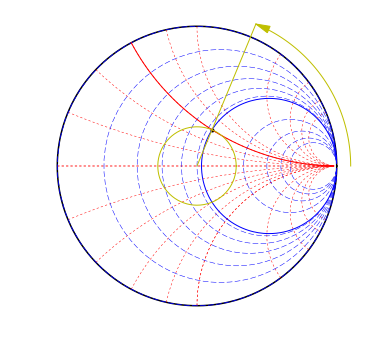

In [21]:
fig=plt.figure()
fig.set_size_inches(5.7,5.7)
inicia()
punto(gammaL.real,gammaL.imag,c='k')
cirr(zln.real,c='b')
cirx(zln.imag,c='r')
circulo(np.abs(gammaL),c='y')
linea(0,0,*P2c(1.1,np.angle(gammaL)),c='y')
arco(1.1,0,np.angle(gammaL),c='y')
plt.show()

## Funciones de cálculo numérico

Utiliza la función `brentq(f,a,b)`, que se importa desde el paquete `scipy.optimize`, y determina un cero de la función `f` en el intervalo `[a,b]`.

Se han definido dos funciones `Zwfc` e `Ywfc` según se trate de impedancias o admitancias. Los parámetros de ambas funciones son: impedancia de carga normalizada, `zln`, límites inferior y superior del intervalo de búsqueda, `a` y `b`, valor a encontrar, `c`, cadena con los valores `re` o `im` según queramos buscar en la parte real o imaginaria de la impedancia o admitancia. 

In [16]:
# Funcion de calculo numerico de ceros
# Se importa el metodo 'brentq'
from scipy.optimize import brentq
def Zwfc(zln,a,b,c,reim):
    """
    (zln,a,b,c,reim)
    Punto donde Z_w para zln vale c.
    [a,b] intervalo de busqueda
    reim='re', 'im'. Sin perdidas
    """
    if reim=='re':
        f=lambda x:c-(ZwSP(x,zln,1,2*pi)).real
    elif reim=='im':
        f=lambda x:c-(ZwSP(x,zln,1,2*pi)).imag
    else:
        print('Defina re o im')
        return
    z1=brentq(f,a,b)
    return z1
def Ywfc(zln,a,b,c,reim):
    """
    (zln,a,b,c,reim)
    Punto donde Y_w para zln vale c.
    [a,b] intervalo de busqueda
    reim='re', 'im'. Sin perdidas
    """
    if reim=='re':
        f=lambda x:c-(1/ZwSP(x,zln,1,2*pi)).real
    elif reim=='im':
        f=lambda x:c-(1/ZwSP(x,zln,1,2*pi)).imag
    else:
        print('Defina re o im')
        return
    z1=brentq(f,a,b)
    return z1


Para usar estas funciones hay que determinar primero, de forma gráfica, los intervalos de búsqueda.
En la figura siguiente, se hace la representación gráfica de la admitancia en cada punto de la línea, tanto real como imaginaria (doble eje Y) y se determinan los cortes con la recta unidad.

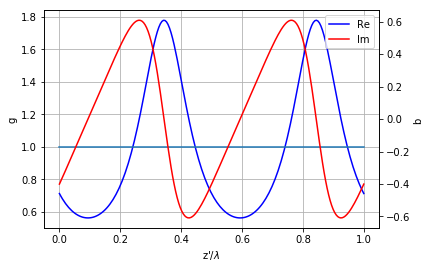

In [17]:
# Representacion entre 0 y 1 lambda
zps=np.linspace(0,1,200)  
# Admitancias, zl normalizada, zin=1, be=2*pi
ads=1/ZwSP(zps,zln,1,2*pi) 
unos=np.ones(200)  # La recta g=1
plt.grid()
plt.xlabel(r"z'/$\lambda$")
plt.ylabel('g')  
# Representamos la conductancia normalizada
l1=plt.plot(zps,ads.real,c='b') 
plt.plot(zps,unos)
plt.twinx()
# Representamos la susceptancia normalizada
l2=plt.plot(zps,ads.imag,c='r')  
plt.ylabel('b ')
l12=l1+l2
plt.legend(l12,['Re','Im'])
plt.show()

Podemos estimar un primer intervalo entre 0.2 y 0.3, y un segundo intervalo entre 0.4 y 0.5.
Llamamos a la función `Ywfc` con los argumentos pertinentes y obtenemos los valores más exactos de corte con el valor 1. 

In [26]:
zn1=Ywfc(zln,0.2,0.3,1,'re')
zn2=Ywfc(zln,0.4,0.5,1,'re')
Prc(('Znst1','Znst2'),(zn1,zn2))

Znst1= 2.41E-01
Znst2= 4.46E-01
